In [32]:
import cv2
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Task 01

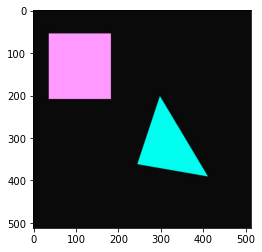

In [2]:
# original image
image = cv2.imread('2ob.jpg', 1)
plt.imshow(image)

In [3]:
#add noise
noise = np.zeros((512, 512, 3), dtype=np.uint8)
cv2.randn(noise, 0, 100)
noiseImage = cv2.add(image, noise)

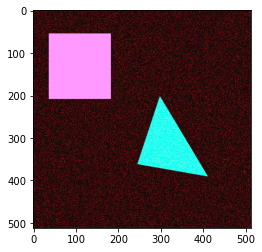

In [4]:
plt.imshow(noiseImage)

In [5]:
th = 0
max_val = 255

110.0


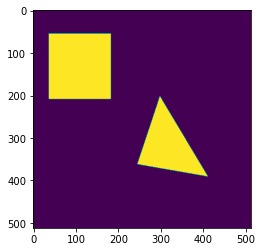

In [7]:
#Otsu’s algorithm 
noiseImage = noiseImage.astype("uint8")
gray_image = cv2.cvtColor(noiseImage, cv2.COLOR_BGR2GRAY)
thresh, finalImg = cv2.threshold(gray_image, th, max_val, cv2.THRESH_BINARY+cv2.THRESH_OTSU )
print(thresh)
plt.imshow(finalImg)

## Task 02

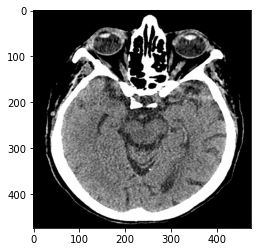

In [46]:
img = cv2.imread('asd1.jpeg')
plt.imshow(img)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mark the selected pixels
mask = np.zeros_like(gray)

# seed points
seeds = [(255, 255)]

# color difference threshold
threshold = 10

In [41]:
for seed in seeds:
    mask[seed[0], seed[1]] = 1

In [42]:
def check_neighbor_threshold(gray,coord,seed,threshold):
    return (gray[coord['x'], coord['y']] >= (gray[seed[0], seed[1]] - threshold)) and (
     gray[coord['x'], coord['y']] <= (gray[seed[0], seed[1]] + threshold))

In [43]:
def check_neighbor_bounds(coord,gray):
    return (coord['x'] < 0 or coord['x'] >= gray.shape[0]) or (
            coord['y'] < 0 or coord['y'] >= gray.shape[1])

In [44]:
# 4 connected neighbors
neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for seed in seeds:
    for neighbor in neighbors:
        coord = {
            'x': seed[0] + neighbor[0],
            'y': seed[1] + neighbor[1]
        }

        if (check_neighbor_bounds(coord,gray_image)):
            continue

        # check if the neighbor is already marked
        if mask[coord['x'], coord['y']] != 0:
            continue

        if (check_neighbor_threshold(gray_image,coord,seed,threshold)):
            mask[coord['x'], coord['y']] = 1
            seeds.append((coord['x'], coord['y']))

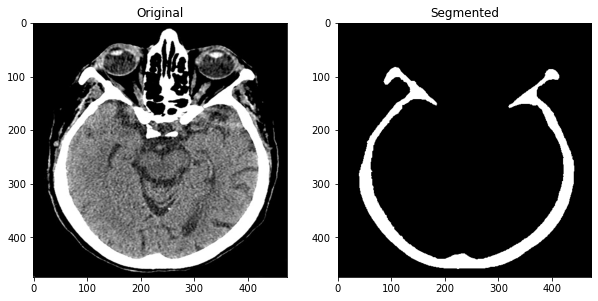

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Segmented')

plt.show()